In [91]:
import numpy as np
import pandas as pd
data = pd.read_csv('test_dataset.csv')
AQI = data.iloc[:, 10].values # used to be 7


# indexes = [2, 3, 5]
# for index in sorted(indexes, reverse=True):
#     del my_list[index]
print(type(AQI))
print(len(AQI))

AQI = AQI.tolist()

# idx_l = []
# for i in range(len(AQI)):
#     if AQI[i] < 0 or AQI[i] > 500:
#         idx_l.append(i)
        
# for index in sorted(idx_l, reverse=True):
#     del AQI[index]

# print(len(AQI))
# AQI = np.array(AQI)

        

<class 'numpy.ndarray'>
8736


In [92]:
# displaying selected columns
print()
# displaying a single column (Population)
# print(AQI)
print(AQI[len(AQI)//2: (len(AQI)//2) + 3])


[43.0, 47.0, 44.0]


In [93]:
import numpy as np

def average_adiag(x):
    """Average antidiagonal elements of a 2d array
    Parameters:
    -----------
    x : np.array
        2d numpy array of size

    Return:
    -------
    x1d : np.array
        1d numpy array representing averaged antediangonal elements of x

    """
    x1d = [np.mean(x[::-1, :].diagonal(i)) for i in
           range(-x.shape[0] + 1, x.shape[1])]
    return np.array(x1d)
    
# x = np.arange(12).reshape(4,3)
# print(x)
load_np_baseline = np.load('average_baseline_24.npy')
load_np_lstm = np.load('LSTM_48_6_average_preds.npy')
load_np_bilstm = np.load('BiLSTM_average_pred_48_6.npy')
load_np_trans = np.load('Transformer_48_6_average_pred.npy')
load_np_transv2 = np.load('TransformerV2_average_pred6.npy')
new_np_baseline = average_adiag(load_np_baseline)
new_np_lstm = average_adiag(load_np_lstm)
new_np_bilstm = average_adiag(load_np_bilstm)
new_np_trans = average_adiag(load_np_trans)
new_np_transv2 = average_adiag(load_np_transv2)

new_np_baseline = new_np_baseline.tolist()
new_np_lstm = new_np_lstm.tolist()
new_np_bilstm = new_np_bilstm.tolist()
new_np_trans = new_np_trans.tolist()
new_np_transv2 = new_np_transv2.tolist()

idx_l = []
for i in range(len(AQI)):
    if AQI[i] < 0 or AQI[i] > 500:
        idx_l.append(i)
    if new_np_bilstm[i] < 0:
        idx_l.append(i)

for index in sorted(idx_l, reverse=True):
    del AQI[index]

print(len(AQI))
AQI = np.array(AQI)

for index in sorted(idx_l, reverse=True):
    del new_np_baseline[index]

for index in sorted(idx_l, reverse=True):
    del new_np_lstm[index]
    
for index in sorted(idx_l, reverse=True):
    del new_np_bilstm[index]
    
for index in sorted(idx_l, reverse=True):
    del new_np_trans[index]
    
for index in sorted(idx_l, reverse=True):
    del new_np_transv2[index]
    
    

new_np_baseline = np.array(new_np_baseline)
new_np_lstm = np.array(new_np_lstm)
new_np_bilstm = np.array(new_np_bilstm)
new_np_trans = np.array(new_np_trans)
new_np_transv2 = np.array(new_np_transv2)



print(new_np_lstm)


print(new_np_lstm[len(new_np_lstm)//2: (len(new_np_lstm)//2) + 3])
print(new_np_bilstm[len(new_np_bilstm)//2: (len(new_np_bilstm)//2) + 3])
print(new_np_trans[len(new_np_trans)//2: (len(new_np_trans)//2) + 3])
# print(new_np)# Online Python compiler (interpreter) to run Python online.
# Write Python 3 code in this online editor and run it.

8522
[187.33371862 189.19318899 186.23244095 ...  33.36046518  36.23107568
  37.72038778]
[28.44895406 31.48269383 31.21926182]
[27.72612088 30.48226102 31.99349282]
[34.40383334 36.23360464 37.01657478]


In [94]:
len(AQI)

8522

In [95]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

In [96]:
for i in range(len(AQI)):
    if AQI[i] < 0:
        np.delete(AQI, i)
        np.delete(new_np_baseline, i)
        np.delete(new_np_lstm, i)
        np.delete(new_np_bilstm, i)
        np.delete(new_np_trans, i)
        np.delete(new_np_transv2, i)

print("Transformers")
print("MAE: " , (mean_absolute_error(AQI, new_np_trans)))
print("RMSE: " , (sqrt(mean_squared_error(AQI, new_np_trans))))
print("R2: " , (r2_score(AQI, new_np_trans)))

Transformers
MAE:  22.42370612885968
RMSE:  34.67797762006462
R2:  0.8204597170476201


In [97]:
# for i in range(len(AQI)):
#     if AQI[i] < 0:
#         np.delete(AQI, i)
#         np.delete(new_np_lstm, i)

# print("LSTM")
# print("MAE: " , (mean_absolute_error(AQI, new_np_lstm)))
# print("RMSE: " , (sqrt(mean_squared_error(AQI, new_np_lstm))))
# print("R2: " , (r2_score(AQI, new_np_lstm)))

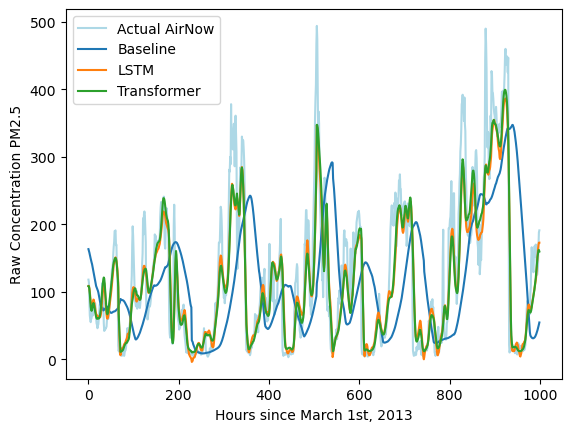

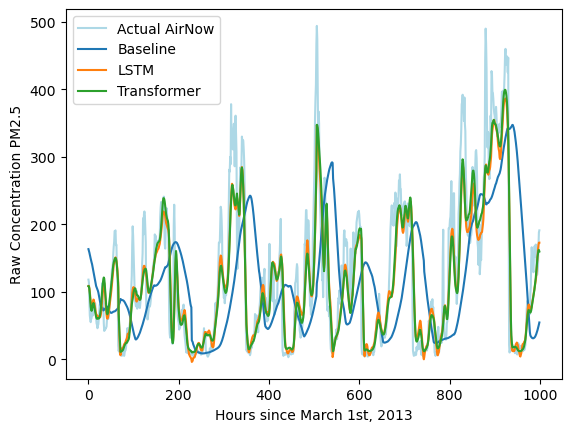

In [98]:
import matplotlib.pyplot as plt

plt.plot(AQI[6000:7000], label='Actual AirNow', color='lightblue')
plt.plot(new_np_baseline[6000:7000], label='Baseline')
plt.plot(new_np_lstm[6000:7000], label='LSTM')
# plt.plot(new_np_bilstm[6000:7000], label='BiLSTM')
plt.plot(new_np_trans[6000:7000], label='Transformer')
# plt.plot(new_np_transv2[6000:7000], label='TransformerV2')
plt.xlabel('Hours since March 1st, 2013')
plt.ylabel('Raw Concentration PM2.5')
plt.legend()
plt.show()

plt.plot(AQI[6000:7000], label='Actual AirNow', color='lightblue')
plt.plot(new_np_baseline[6000:7000], label='Baseline')
plt.plot(new_np_lstm[6000:7000], label='LSTM')
# plt.plot(new_np_bilstm[6000:7000], label='BiLSTM')
plt.plot(new_np_trans[6000:7000], label='Transformer')
# plt.plot(new_np_transv2[6000:7000], label='TransformerV2')
plt.xlabel('Hours since March 1st, 2013')
plt.ylabel('Raw Concentration PM2.5')
plt.legend()
plt.show()


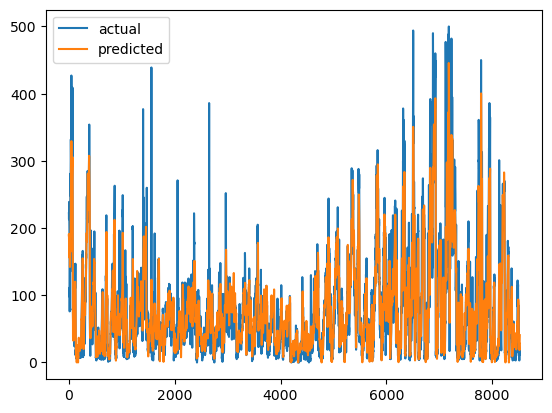

In [99]:
import matplotlib.pyplot as plt

plt.plot(AQI, label='actual')
plt.plot(new_np_bilstm, label='predicted')
plt.legend()
plt.show()

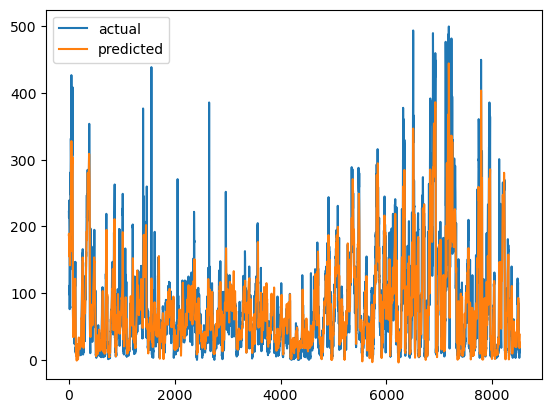

In [100]:
import matplotlib.pyplot as plt

plt.plot(AQI, label='actual')
plt.plot(new_np_lstm, label='predicted')
plt.legend()
plt.show()

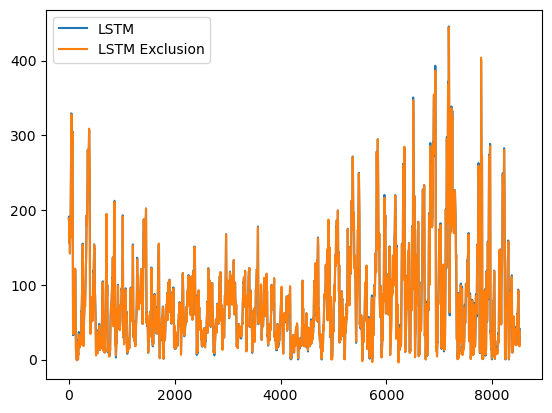

In [101]:
import matplotlib.pyplot as plt

plt.plot(new_np_bilstm, label='LSTM')
plt.plot(new_np_lstm, label='LSTM Exclusion')
plt.legend()
plt.show()

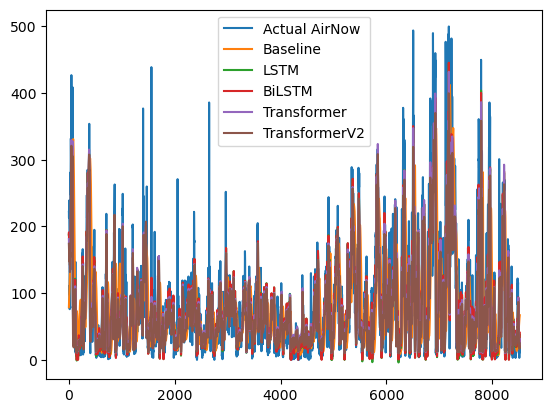

In [102]:
import matplotlib.pyplot as plt

plt.plot(AQI, label='Actual AirNow')
plt.plot(new_np_baseline, label='Baseline')
plt.plot(new_np_lstm, label='LSTM')
plt.plot(new_np_bilstm, label='BiLSTM')
plt.plot(new_np_trans, label='Transformer')
plt.plot(new_np_transv2, label='TransformerV2')
plt.legend()
plt.show()


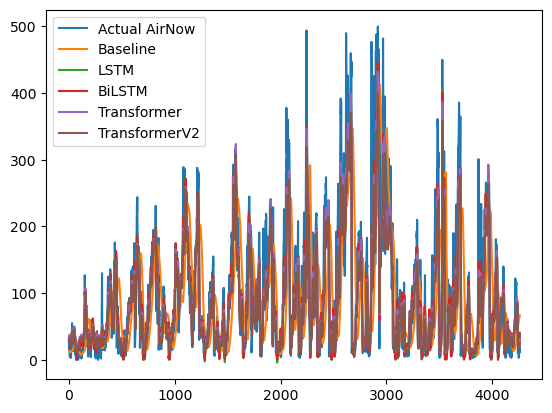

In [103]:
import matplotlib.pyplot as plt

plt.plot(AQI[len(AQI)//2:], label='Actual AirNow')
plt.plot(new_np_baseline[len(AQI)//2:], label='Baseline')
plt.plot(new_np_lstm[len(AQI)//2:], label='LSTM')
plt.plot(new_np_bilstm[len(AQI)//2:], label='BiLSTM')
plt.plot(new_np_trans[len(AQI)//2:], label='Transformer')
plt.plot(new_np_transv2[len(AQI)//2:], label='TransformerV2')
plt.legend()
plt.show()

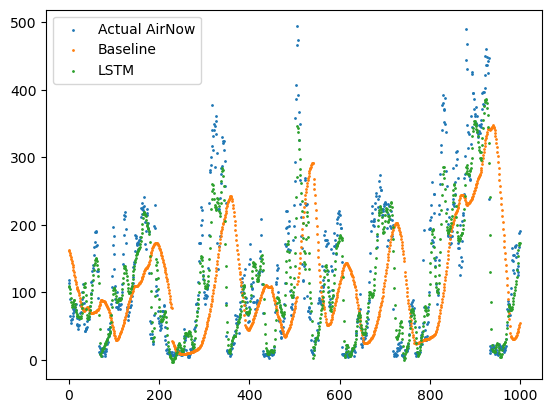

In [104]:
import matplotlib.pyplot as plt


plt.scatter(np.arange(len(AQI[6000:7000])), AQI[6000:7000], label='Actual AirNow', s = 1)
plt.scatter(np.arange(len(AQI[6000:7000])), new_np_baseline[6000:7000], label='Baseline', s = 1)
plt.scatter(np.arange(len(AQI[6000:7000])),new_np_lstm[6000:7000], label='LSTM', s = 1)
# plt.scatter(np.arange(len(AQI[6000:7000])),new_np_bilstm[6000:7000], label='BiLSTM', s = 1)
# plt.scatter(np.arange(len(AQI[6000:7000])),new_np_trans[6000:7000], label='Transformer', s = 1)
# plt.scatter(np.arange(len(AQI[6000:7000])),new_np_transv2[6000:7000], label='TransformerV2', s = 1)
plt.legend()
plt.show()


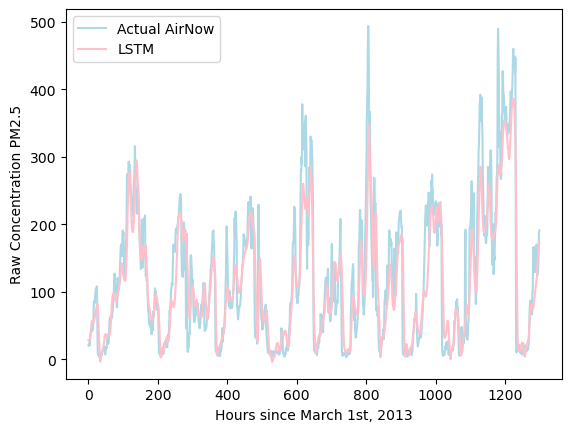

In [105]:
import matplotlib.pyplot as plt

plt.plot(AQI[5700:7000], label='Actual AirNow', color='lightblue')
# plt.plot(new_np_baseline[5700:7000], color='lightcoral', label='Baseline')
plt.plot(new_np_lstm[5700:7000], color='pink', label='LSTM')
# plt.plot(new_np_bilstm[5700:7000], color='khaki', label='BiLSTM')
# plt.plot(new_np_trans[5700:7000], color='orange', label='Transformer')
# plt.plot(new_np_transv2[5700:7000], color='lightgrey', label='TransformerV2')
plt.xlabel('Hours since March 1st, 2013')
plt.ylabel('Raw Concentration PM2.5')
plt.legend()
plt.show()



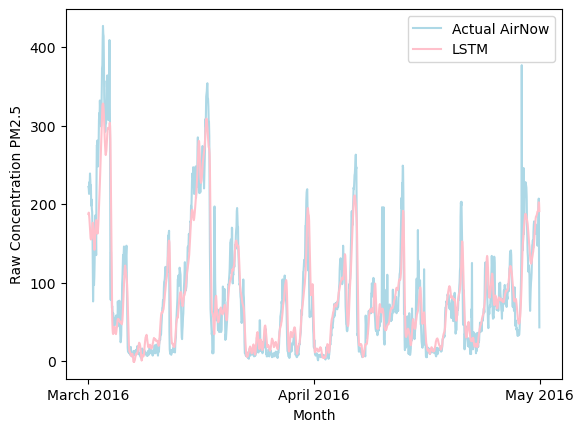

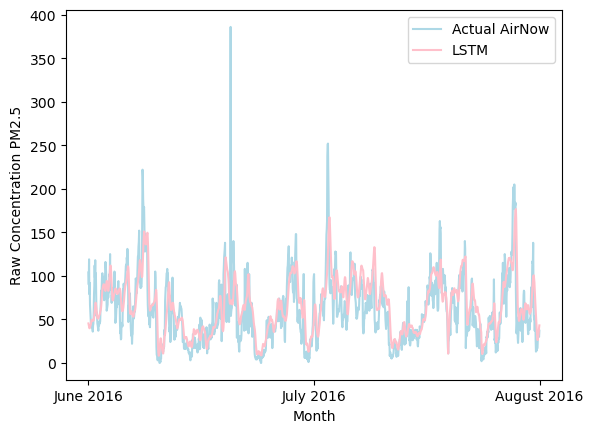

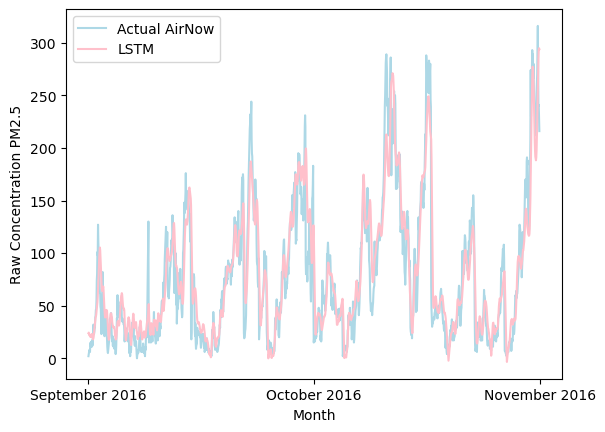

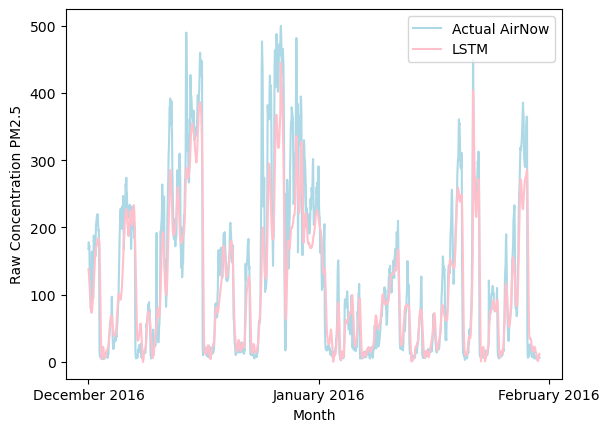

In [106]:
import matplotlib.pyplot as plt

ax = plt.axes()
plt.plot(AQI[0:1460], label='Actual AirNow', color='lightblue')
# plt.plot(new_np_baseline[5700:7000], color='lightcoral', label='Baseline')
plt.plot(new_np_lstm[0:1460], color='pink', label='LSTM')
# plt.plot(new_np_bilstm[5700:7000], color='khaki', label='BiLSTM')
# plt.plot(new_np_trans[5700:7000], color='orange', label='Transformer')
# plt.plot(new_np_transv2[5700:7000], color='lightgrey', label='TransformerV2')
ax.set_xticks([0, 730, 1460])
ax.set_xticklabels(['March 2016', 'April 2016', 'May 2016'])
plt.xlabel('Month')
plt.ylabel('Raw Concentration PM2.5')
plt.legend()
plt.show()

ax = plt.axes()
plt.plot(AQI[2190: 3650], label='Actual AirNow', color='lightblue')
# plt.plot(new_np_baseline[5700:7000], color='lightcoral', label='Baseline')
plt.plot(new_np_lstm[2190: 3650], color='pink', label='LSTM')
# plt.plot(new_np_bilstm[5700:7000], color='khaki', label='BiLSTM')
# plt.plot(new_np_trans[5700:7000], color='orange', label='Transformer')
# plt.plot(new_np_transv2[5700:7000], color='lightgrey', label='TransformerV2')
ax.set_xticks([0, 730, 1460])
ax.set_xticklabels(['June 2016', 'July 2016', 'August 2016'])
plt.xlabel('Month')
plt.ylabel('Raw Concentration PM2.5')
plt.legend()
plt.show()

ax = plt.axes()
plt.plot(AQI[4380: 5840], label='Actual AirNow', color='lightblue')
# plt.plot(new_np_baseline[5700:7000], color='lightcoral', label='Baseline')
plt.plot(new_np_lstm[4380: 5840], color='pink', label='LSTM')
# plt.plot(new_np_bilstm[5700:7000], color='khaki', label='BiLSTM')
# plt.plot(new_np_trans[5700:7000], color='orange', label='Transformer')
# plt.plot(new_np_transv2[5700:7000], color='lightgrey', label='TransformerV2')
ax.set_xticks([0, 730, 1460])
ax.set_xticklabels(['September 2016', 'October 2016', 'November 2016'])
plt.xlabel('Month')
plt.ylabel('Raw Concentration PM2.5')
plt.legend()
plt.show()

ax = plt.axes()
plt.plot(AQI[6570: 8000], label='Actual AirNow', color='lightblue')
# plt.plot(new_np_baseline[5700:7000], color='lightcoral', label='Baseline')
plt.plot(new_np_lstm[6570: 8000], color='pink', label='LSTM')
# plt.plot(new_np_bilstm[5700:7000], color='khaki', label='BiLSTM')
# plt.plot(new_np_trans[5700:7000], color='orange', label='Transformer')
# plt.plot(new_np_transv2[5700:7000], color='lightgrey', label='TransformerV2')
ax.set_xticks([0, 730, 1460])
ax.set_xticklabels(['December 2016', 'January 2016', 'February 2016'])
plt.xlabel('Month')
plt.ylabel('Raw Concentration PM2.5')
plt.legend()
plt.show()


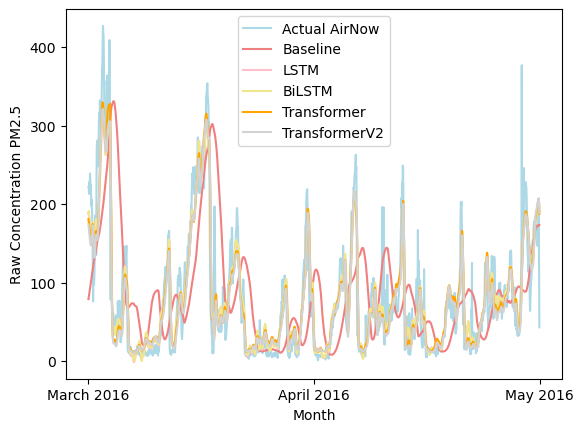

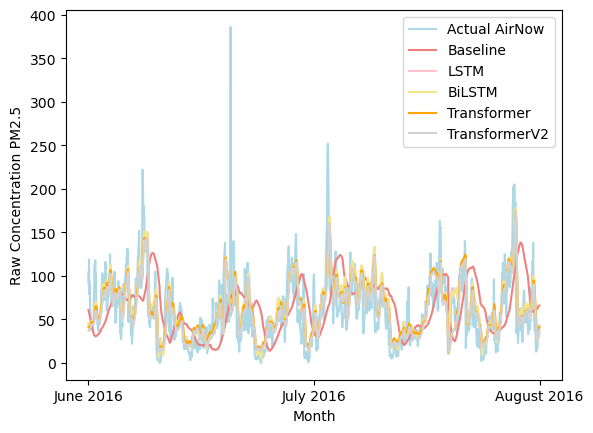

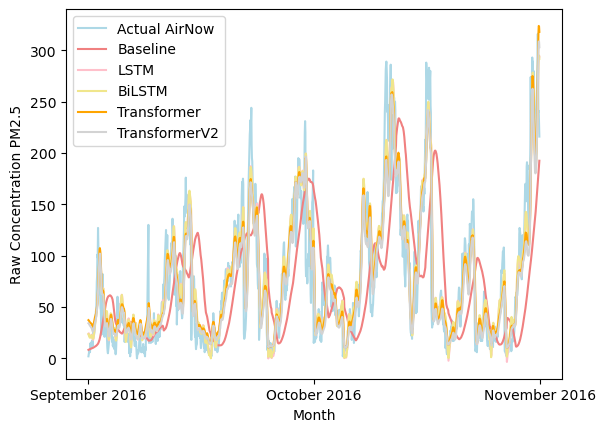

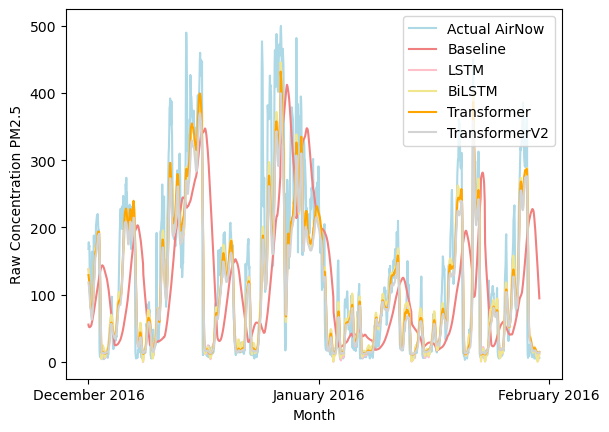

In [107]:
import matplotlib.pyplot as plt

ax = plt.axes()
plt.plot(AQI[0:1460], label='Actual AirNow', color='lightblue')
plt.plot(new_np_baseline[0:1460], color='lightcoral', label='Baseline')
plt.plot(new_np_lstm[0:1460], color='pink', label='LSTM')
plt.plot(new_np_bilstm[0:1460], color='khaki', label='BiLSTM')
plt.plot(new_np_trans[0:1460], color='orange', label='Transformer')
plt.plot(new_np_transv2[0:1460], color='lightgrey', label='TransformerV2')
ax.set_xticks([0, 730, 1460])
ax.set_xticklabels(['March 2016', 'April 2016', 'May 2016'])
plt.xlabel('Month')
plt.ylabel('Raw Concentration PM2.5')
plt.legend()
plt.show()

ax = plt.axes()
plt.plot(AQI[2190: 3650], label='Actual AirNow', color='lightblue')
plt.plot(new_np_baseline[2190: 3650], color='lightcoral', label='Baseline')
plt.plot(new_np_lstm[2190: 3650], color='pink', label='LSTM')
plt.plot(new_np_bilstm[2190: 3650], color='khaki', label='BiLSTM')
plt.plot(new_np_trans[2190: 3650], color='orange', label='Transformer')
plt.plot(new_np_transv2[2190: 3650], color='lightgrey', label='TransformerV2')
ax.set_xticks([0, 730, 1460])
ax.set_xticklabels(['June 2016', 'July 2016', 'August 2016'])
plt.xlabel('Month')
plt.ylabel('Raw Concentration PM2.5')
plt.legend()
plt.show()

ax = plt.axes()
plt.plot(AQI[4380: 5840], label='Actual AirNow', color='lightblue')
plt.plot(new_np_baseline[4380: 5840], color='lightcoral', label='Baseline')
plt.plot(new_np_lstm[4380: 5840], color='pink', label='LSTM')
plt.plot(new_np_bilstm[4380: 5840], color='khaki', label='BiLSTM')
plt.plot(new_np_trans[4380: 5840], color='orange', label='Transformer')
plt.plot(new_np_transv2[4380: 5840], color='lightgrey', label='TransformerV2')
ax.set_xticks([0, 730, 1460])
ax.set_xticklabels(['September 2016', 'October 2016', 'November 2016'])
plt.xlabel('Month')
plt.ylabel('Raw Concentration PM2.5')
plt.legend()
plt.show()

ax = plt.axes()
plt.plot(AQI[6570: 8000], label='Actual AirNow', color='lightblue')
plt.plot(new_np_baseline[6570: 8000], color='lightcoral', label='Baseline')
plt.plot(new_np_lstm[6570: 8000], color='pink', label='LSTM')
plt.plot(new_np_bilstm[6570: 8000], color='khaki', label='BiLSTM')
plt.plot(new_np_trans[6570: 8000], color='orange', label='Transformer')
plt.plot(new_np_transv2[6570: 8000], color='lightgrey', label='TransformerV2')
ax.set_xticks([0, 730, 1460])
ax.set_xticklabels(['December 2016', 'January 2016', 'February 2016'])
plt.xlabel('Month')
plt.ylabel('Raw Concentration PM2.5')
plt.legend()
plt.show()

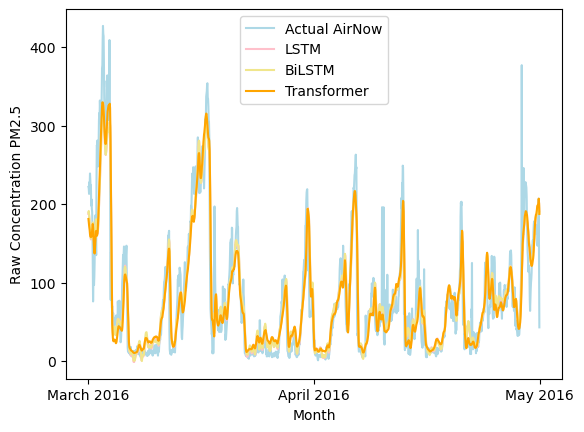

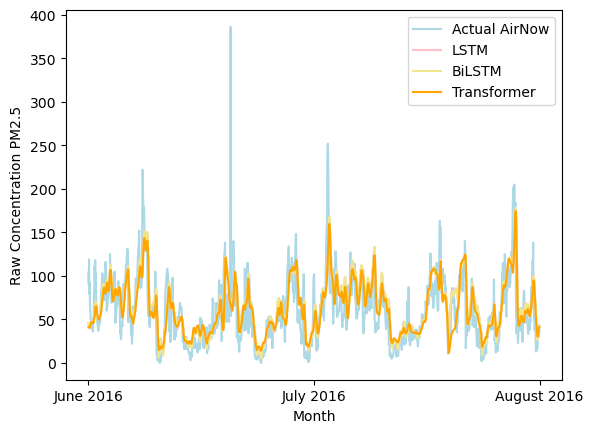

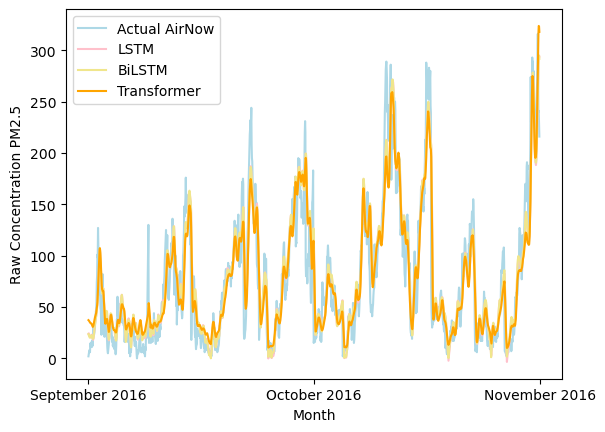

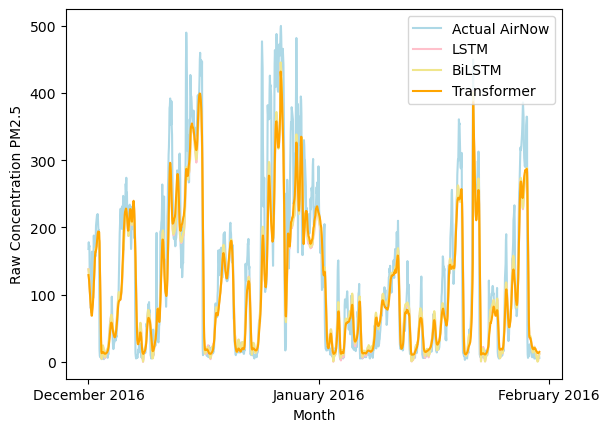

In [108]:
import matplotlib.pyplot as plt

ax = plt.axes()
plt.plot(AQI[0:1460], label='Actual AirNow', color='lightblue')
# plt.plot(new_np_baseline[0:1460], color='lightcoral', label='Baseline')
plt.plot(new_np_lstm[0:1460], color='pink', label='LSTM')
plt.plot(new_np_bilstm[0:1460], color='khaki', label='BiLSTM')
plt.plot(new_np_trans[0:1460], color='orange', label='Transformer')
# plt.plot(new_np_transv2[0:1460], color='lightgrey', label='TransformerV2')
ax.set_xticks([0, 730, 1460])
ax.set_xticklabels(['March 2016', 'April 2016', 'May 2016'])
plt.xlabel('Month')
plt.ylabel('Raw Concentration PM2.5')
plt.legend()
plt.show()

ax = plt.axes()
plt.plot(AQI[2190: 3650], label='Actual AirNow', color='lightblue')
# plt.plot(new_np_baseline[2190: 3650], color='lightcoral', label='Baseline')
plt.plot(new_np_lstm[2190: 3650], color='pink', label='LSTM')
plt.plot(new_np_bilstm[2190: 3650], color='khaki', label='BiLSTM')
plt.plot(new_np_trans[2190: 3650], color='orange', label='Transformer')
# plt.plot(new_np_transv2[2190: 3650], color='lightgrey', label='TransformerV2')
ax.set_xticks([0, 730, 1460])
ax.set_xticklabels(['June 2016', 'July 2016', 'August 2016'])
plt.xlabel('Month')
plt.ylabel('Raw Concentration PM2.5')
plt.legend()
plt.show()

ax = plt.axes()
plt.plot(AQI[4380: 5840], label='Actual AirNow', color='lightblue')
# plt.plot(new_np_baseline[4380: 5840], color='lightcoral', label='Baseline')
plt.plot(new_np_lstm[4380: 5840], color='pink', label='LSTM')
plt.plot(new_np_bilstm[4380: 5840], color='khaki', label='BiLSTM')
plt.plot(new_np_trans[4380: 5840], color='orange', label='Transformer')
# plt.plot(new_np_transv2[4380: 5840], color='lightgrey', label='TransformerV2')
ax.set_xticks([0, 730, 1460])
ax.set_xticklabels(['September 2016', 'October 2016', 'November 2016'])
plt.xlabel('Month')
plt.ylabel('Raw Concentration PM2.5')
plt.legend()
plt.show()

ax = plt.axes()
plt.plot(AQI[6570: 8000], label='Actual AirNow', color='lightblue')
# plt.plot(new_np_baseline[6570: 8000], color='lightcoral', label='Baseline')
plt.plot(new_np_lstm[6570: 8000], color='pink', label='LSTM')
plt.plot(new_np_bilstm[6570: 8000], color='khaki', label='BiLSTM')
plt.plot(new_np_trans[6570: 8000], color='orange', label='Transformer')
# plt.plot(new_np_transv2[6570: 8000], color='lightgrey', label='TransformerV2')
ax.set_xticks([0, 730, 1460])
ax.set_xticklabels(['December 2016', 'January 2016', 'February 2016'])
plt.xlabel('Month')
plt.ylabel('Raw Concentration PM2.5')
plt.legend()
plt.show()

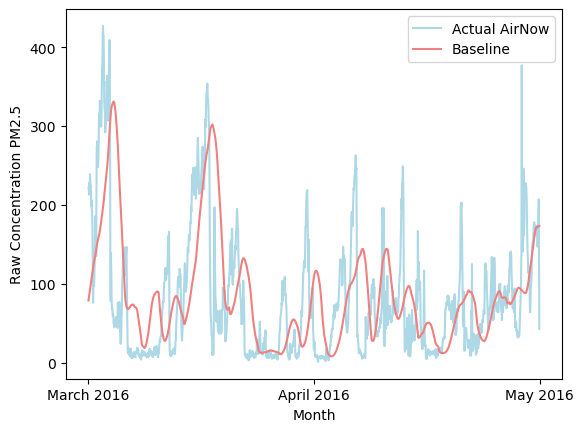

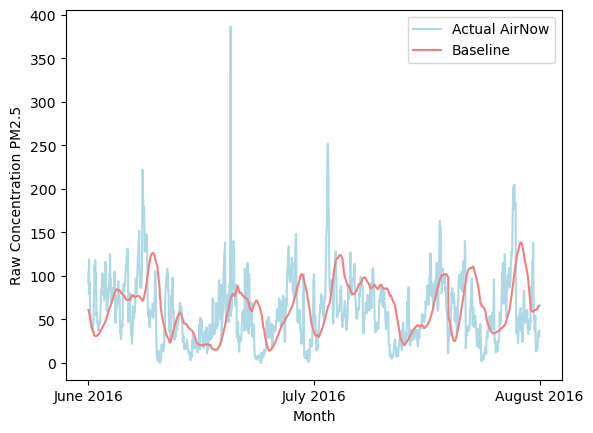

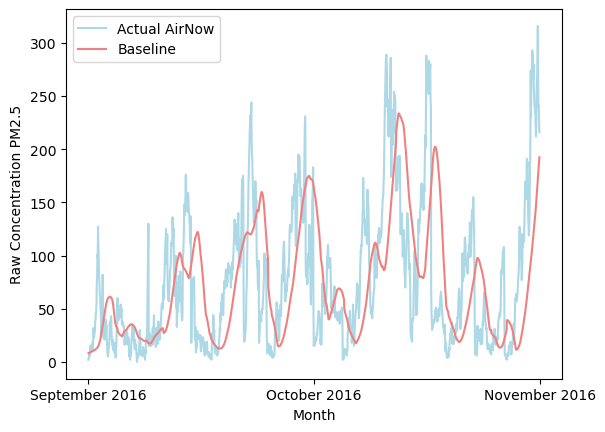

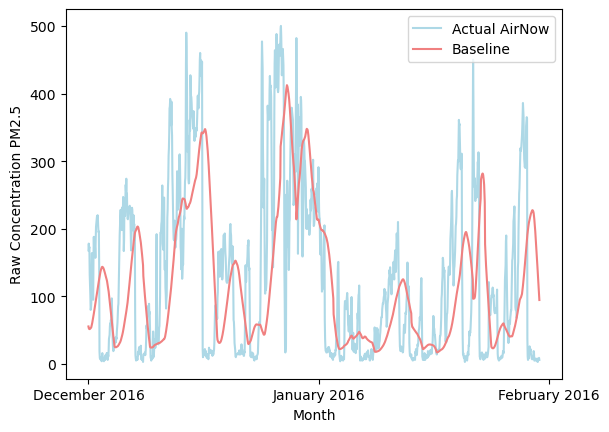

In [109]:
import matplotlib.pyplot as plt

ax = plt.axes()
plt.plot(AQI[0:1460], label='Actual AirNow', color='lightblue')
plt.plot(new_np_baseline[0:1460], color='lightcoral', label='Baseline')
# plt.plot(new_np_lstm[0:1460], color='pink', label='LSTM')
# plt.plot(new_np_bilstm[0:1460], color='khaki', label='BiLSTM')
# plt.plot(new_np_trans[0:1460], color='orange', label='Transformer')
# plt.plot(new_np_transv2[0:1460], color='lightgrey', label='TransformerV2')
ax.set_xticks([0, 730, 1460])
ax.set_xticklabels(['March 2016', 'April 2016', 'May 2016'])
plt.xlabel('Month')
plt.ylabel('Raw Concentration PM2.5')
plt.legend()
plt.show()

ax = plt.axes()
plt.plot(AQI[2190: 3650], label='Actual AirNow', color='lightblue')
plt.plot(new_np_baseline[2190: 3650], color='lightcoral', label='Baseline')
# plt.plot(new_np_lstm[2190: 3650], color='pink', label='LSTM')
# plt.plot(new_np_bilstm[2190: 3650], color='khaki', label='BiLSTM')
# plt.plot(new_np_trans[2190: 3650], color='orange', label='Transformer')
# plt.plot(new_np_transv2[2190: 3650], color='lightgrey', label='TransformerV2')
ax.set_xticks([0, 730, 1460])
ax.set_xticklabels(['June 2016', 'July 2016', 'August 2016'])
plt.xlabel('Month')
plt.ylabel('Raw Concentration PM2.5')
plt.legend()
plt.show()

ax = plt.axes()
plt.plot(AQI[4380: 5840], label='Actual AirNow', color='lightblue')
plt.plot(new_np_baseline[4380: 5840], color='lightcoral', label='Baseline')
# plt.plot(new_np_lstm[4380: 5840], color='pink', label='LSTM')
# plt.plot(new_np_bilstm[4380: 5840], color='khaki', label='BiLSTM')
# plt.plot(new_np_trans[4380: 5840], color='orange', label='Transformer')
# plt.plot(new_np_transv2[4380: 5840], color='lightgrey', label='TransformerV2')
ax.set_xticks([0, 730, 1460])
ax.set_xticklabels(['September 2016', 'October 2016', 'November 2016'])
plt.xlabel('Month')
plt.ylabel('Raw Concentration PM2.5')
plt.legend()
plt.show()

ax = plt.axes()
plt.plot(AQI[6570: 8000], label='Actual AirNow', color='lightblue')
plt.plot(new_np_baseline[6570: 8000], color='lightcoral', label='Baseline')
# plt.plot(new_np_lstm[6570: 8000], color='pink', label='LSTM')
# plt.plot(new_np_bilstm[6570: 8000], color='khaki', label='BiLSTM')
# plt.plot(new_np_trans[6570: 8000], color='orange', label='Transformer')
# plt.plot(new_np_transv2[6570: 8000], color='lightgrey', label='TransformerV2')
ax.set_xticks([0, 730, 1460])
ax.set_xticklabels(['December 2016', 'January 2016', 'February 2016'])
plt.xlabel('Month')
plt.ylabel('Raw Concentration PM2.5')
plt.legend()
plt.show()